#### Khai báo thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,45.486980,4.540741,12.501594,25.868407,21.845678
1,42.484213,12.086396,9.840478,-2.242658,25.716902
2,57.777115,1.474713,11.609708,21.669570,14.562877
3,44.825257,3.203790,11.584205,15.772526,19.689168
4,59.094257,0.770246,8.970041,6.531938,23.384959


#### Trực quan hóa dữ liệu sinh ra

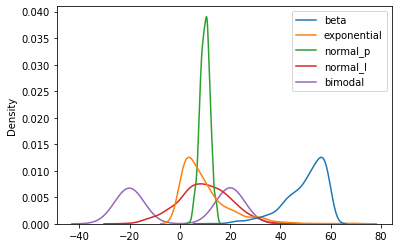

In [5]:
sns.kdeplot(data=df);

#### Hiển thị thống kê về dữ liệu sinh ra

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.943792,10.190604,9.988519,9.851438,-0.017723
std,8.317931,10.086752,1.970122,10.325437,20.305840
min,11.657178,0.028594,3.487758,-22.419100,-27.658748
25%,45.402833,3.027105,8.657455,3.222803,-20.160660
50%,52.176841,7.280295,10.006584,9.770423,0.104472
75%,56.429269,13.821153,11.309073,16.778362,20.028521
max,59.950004,70.561087,15.131502,43.405436,30.300313


#### Thêm một đặc trưng với giá trị lớn hơn nhiều

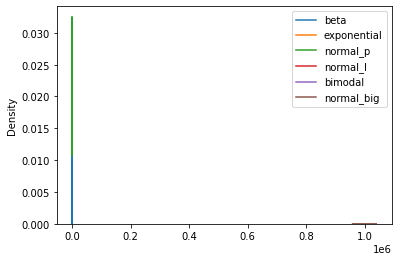

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df);

<AxesSubplot:>

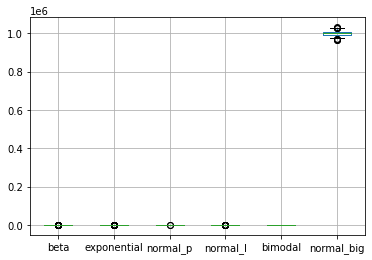

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

#### Chuẩn hóa với Min-Max scaling

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.700514,0.063973,0.774136,0.733579,0.854127,0.429258
1,0.638336,0.170954,0.545591,0.306519,0.920920,0.779297
2,0.955006,0.020503,0.697538,0.669791,0.728473,0.500448
3,0.686812,0.045017,0.695347,0.580203,0.816920,0.481477
4,0.982280,0.010515,0.470835,0.439821,0.880686,0.409878


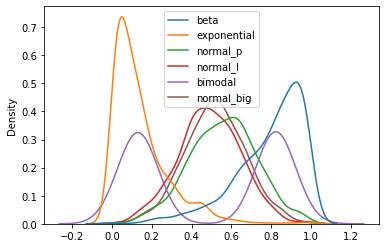

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s);

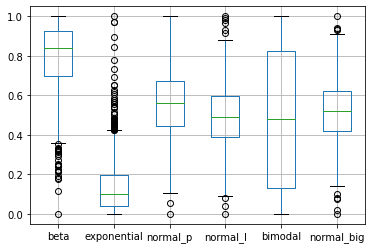

In [13]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot();

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.792801,0.144076,0.558305,0.490251,0.476906,0.518243
std,0.172239,0.143009,0.169200,0.156863,0.350348,0.152694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.698772,0.042512,0.443989,0.389549,0.129369,0.418186
50%,0.839041,0.102814,0.559857,0.489020,0.479014,0.520047
75%,0.927096,0.195549,0.671718,0.595484,0.822775,0.621952
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [16]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [17]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[11.657178195027193,
 0.02859411214322674,
 3.487757754299852,
 -22.419099942972032,
 -27.658747859369818,
 965687.3967752875]

In [18]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.950003975639824,
 70.56108699458358,
 15.131502475017413,
 43.405435926547774,
 30.300313402207273,
 1031395.1889682609]

In [20]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 0.9999999999999999, 1.0, 1.0]